In [3]:
library(tidyverse)
library(readxl)

Warning message:
“package ‘readxl’ was built under R version 3.6.3”


In [13]:
result <- read_excel("../docs/EvaulateResult_MyoPS_Markus Ankenbrand2.xlsx", n_max = 20) %>% select(-4)
result

New names:
* `Dice(scar)` -> `Dice(scar)...2`
* `Dice(edema+scar)` -> `Dice(edema+scar)...3`
* `` -> ...4
* `Dice(scar)` -> `Dice(scar)...5`
* `Dice(edema+scar)` -> `Dice(edema+scar)...6`



Case,Dice(scar)...2,Dice(edema+scar)...3,Dice(scar)...5,Dice(edema+scar)...6
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
'myops_201',0.596726,0.682463,0.586853,0.717485
'myops_202',0.142088,0.595184,0.194063,0.537387
'myops_203',0.539777,0.513431,0.582735,0.570591
'myops_204',0.722959,0.638319,0.781334,0.727651
'myops_205',0.606652,0.574381,0.638317,0.600558
'myops_206',0.729869,0.663438,0.742373,0.805251
myops_207',0.000000,0.487349,0.000000,0.560232
'myops_208',0.732276,0.662005,0.803568,0.758688
'myops_209',0.659720,0.706588,0.722126,0.757268


In [27]:
result_tbl <- result %>%
    pivot_longer(starts_with("Dice")) %>%
    separate(name, into=c("tissue","colnum"), sep='\\.\\.\\.', convert=T) %>%
    mutate(
        model=if_else(colnum>4,"ensemble","multi_patho.35"),
        tissue=str_remove(tissue,"Dice\\("),
        tissue=str_remove(tissue,"\\)"),
        Case=str_remove_all(Case,"'")
    ) %>%
    select(-colnum)

In [33]:
head(result_tbl)

Case,tissue,value,model
<chr>,<chr>,<dbl>,<chr>
myops_201,scar,0.596726,multi_patho.35
myops_201,edema+scar,0.682463,multi_patho.35
myops_201,scar,0.586853,ensemble
myops_201,edema+scar,0.717485,ensemble
myops_202,scar,0.142088,multi_patho.35
myops_202,edema+scar,0.595184,multi_patho.35


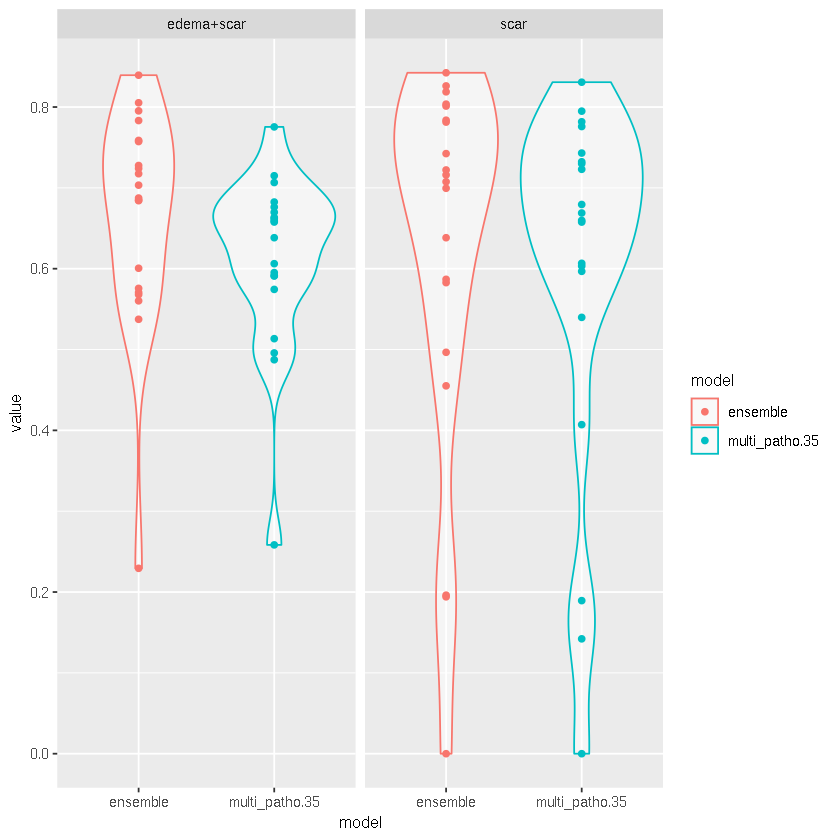

In [71]:
result_tbl %>%
    ggplot(aes(model, value, color=model)) +
    geom_violin(alpha=.5) +
    geom_point() +
    facet_wrap(~tissue)

In [32]:
library(dabestr)

In [34]:
result_dabest_scar <- 
    result_tbl %>%
    filter(tissue=="scar") %>%
    dabest(model, value, 
        idx = c("multi_patho.35", "ensemble"), 
        paired = TRUE, id.col = Case)

Warning message:
“glm.fit: algorithm did not converge”


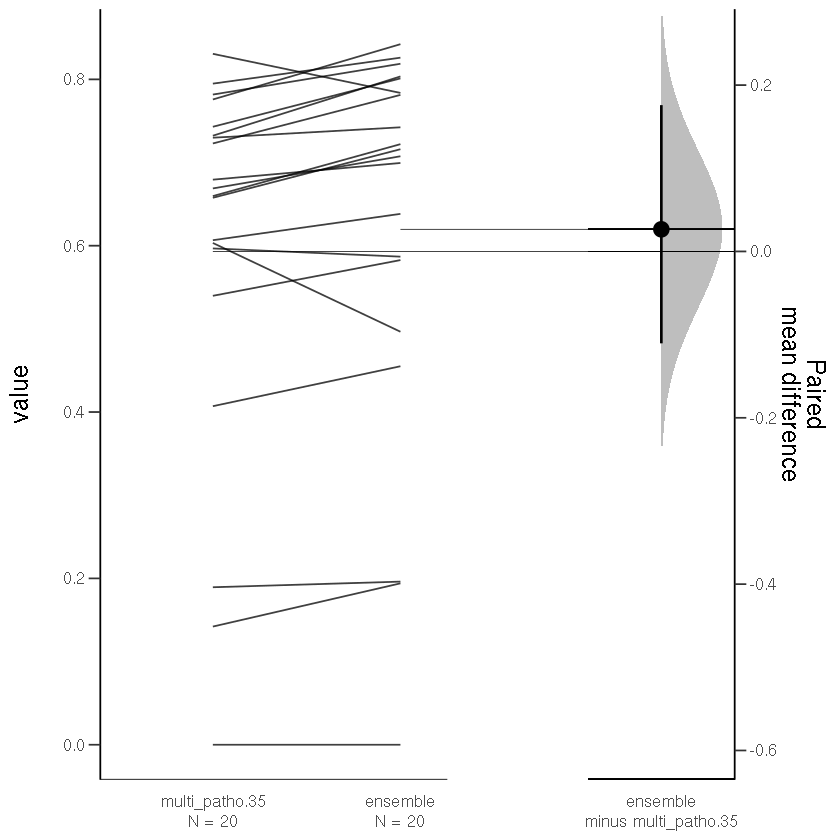

In [85]:
result_dabest_scar %>%
    mean_diff() %>%
    plot

In [38]:
result_dabest_scarEdema <- 
    result_tbl %>%
    filter(tissue!="scar") %>%
    dabest(model, value, 
        idx = c("multi_patho.35", "ensemble"), 
        paired = TRUE, id.col = Case)

Warning message:
“glm.fit: algorithm did not converge”


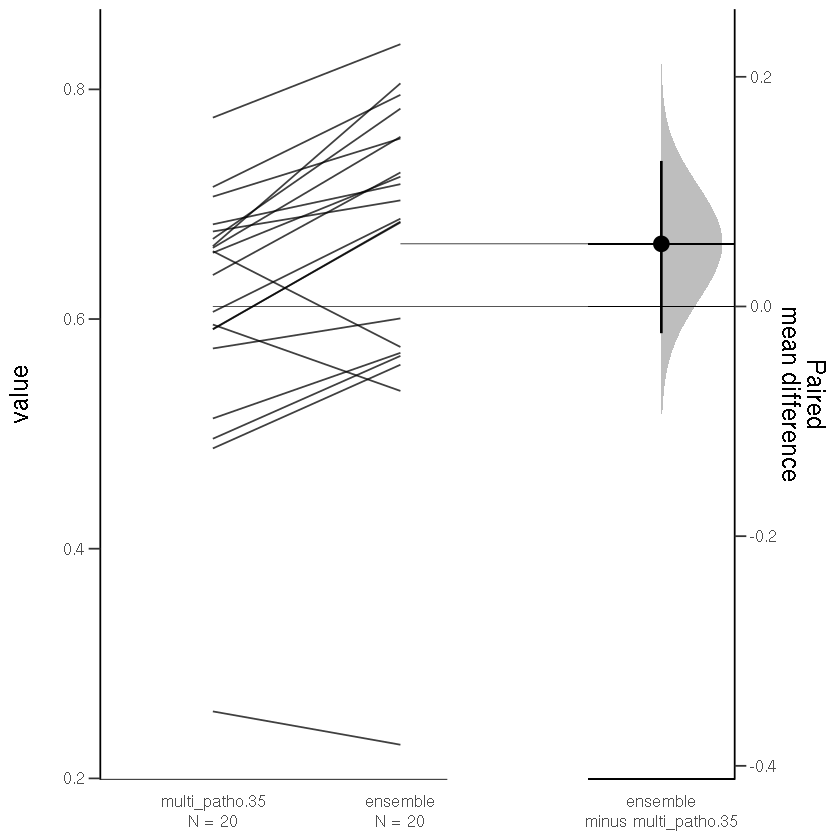

In [39]:
result_dabest_scarEdema %>%
    mean_diff %>%
    plot

## Statistical tests

Data are not normally distributed:

In [68]:
shapiro.test(pull(result[,2]))
shapiro.test(pull(result[,3]))
shapiro.test(pull(result[,4]))
shapiro.test(pull(result[,5]))


	Shapiro-Wilk normality test

data:  pull(result[, 2])
W = 0.80389, p-value = 0.000988



	Shapiro-Wilk normality test

data:  pull(result[, 3])
W = 0.85852, p-value = 0.007429



	Shapiro-Wilk normality test

data:  pull(result[, 4])
W = 0.81109, p-value = 0.001271



	Shapiro-Wilk normality test

data:  pull(result[, 5])
W = 0.85312, p-value = 0.006014


In [75]:
x <- result[,2] %>% pull
y <- result[,4] %>% pull

wilcox.test(x, y, paired = TRUE)

Warning message in wilcox.test.default(x, y, paired = TRUE):
“cannot compute exact p-value with zeroes”



	Wilcoxon signed rank test with continuity correction

data:  x and y
V = 31, p-value = 0.01061
alternative hypothesis: true location shift is not equal to 0


In [76]:
x <- result[,3] %>% pull
y <- result[,5] %>% pull
wilcox.test(x, y, paired = TRUE)


	Wilcoxon signed rank test

data:  x and y
V = 24, p-value = 0.001432
alternative hypothesis: true location shift is not equal to 0
